# SEIS 763 Machine Learning Project Code
# PetFinder.my

## By
## Ke Chen
## Jun Li
## Jared Oeth
## Satish Dandayudhapani

# 1. Setup
**1a. Setup File location**

In [3]:
#load relevant packages
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd
import os
import json
import warnings
warnings.filterwarnings('ignore')

#define path where files, folders, and subfolders exist
initPath = "C:/Users/satishkumard/Google Drive/DataScience/MachineLearningProjects/PetFinderAdoptionPrediction"
# initPath = "C:/Users/satis/Google Drive/DataScience/MachineLearningProjects/PetFinderAdoptionPrediction"
# initPath = "C:/Users/skumar/Documents/JupyterLab/MachineLearning/petfinder-adoption-prediction"
# initPath = "/Users/jaredoeth/Document/petfinder-adoption-prediction"
# initPath ="/Users/kechen/Desktop/petfinder-adoption-prediction"
os.chdir(initPath)


#loading base data sets Data Exploration
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')



# 2. Data Exploration

**2a. Adoption speed classes rates**

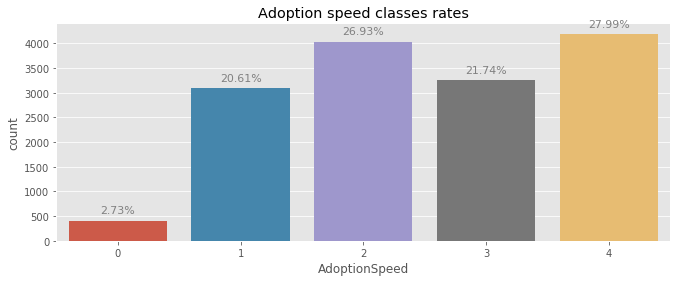

In [2]:
breeds = pd.read_csv('breed_labels.csv')
colors = pd.read_csv('color_labels.csv')
states = pd.read_csv('state_labels.csv')


# Adoption speed classes rates
plt.figure(figsize=(11, 4));
g = sns.countplot(x='AdoptionSpeed', data=dfTrain)
plt.title('Adoption speed classes rates')
ax=g.axes
for p in ax.patches:
     ax.annotate(f"{p.get_height() * 100 / dfTrain.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='gray', rotation=0, xytext=(0, 10),
         textcoords='offset points')  

**2b. Number of cats and dogs in train data**

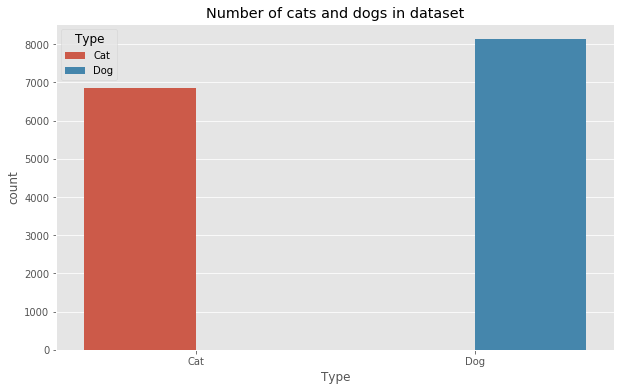

In [3]:
# Number of cats and dogs in dataset 
dfTrain_Type= pd.read_csv('train.csv')
dfTrain_Type['Type'] = dfTrain_Type['Type'].apply(lambda x: 'Dog' if x == 1 else 'Cat')
plt.figure(figsize=(10, 6))
plt.title('Number of cats and dogs in dataset');
sns.countplot(x='Type', data=dfTrain_Type, hue='Type');


**2c. Distribution of pets age**

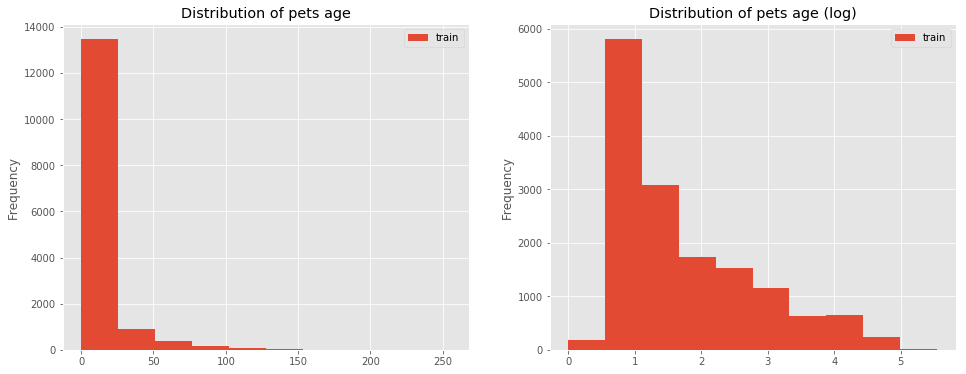

In [4]:
# Distribution of pets age
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.title('Distribution of pets age');
dfTrain['Age'].plot('hist', label='train');
plt.legend();

plt.subplot(1, 2, 2)
plt.title('Distribution of pets age (log)');
np.log1p(dfTrain['Age']).plot('hist', label='train');
plt.legend();



**2d. AdoptionSpeed Vs Age**

Text(0.5, 1.0, 'AdoptionSpeed by Type and age')

<Figure size 2160x1152 with 0 Axes>

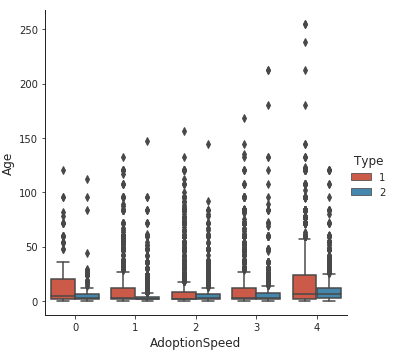

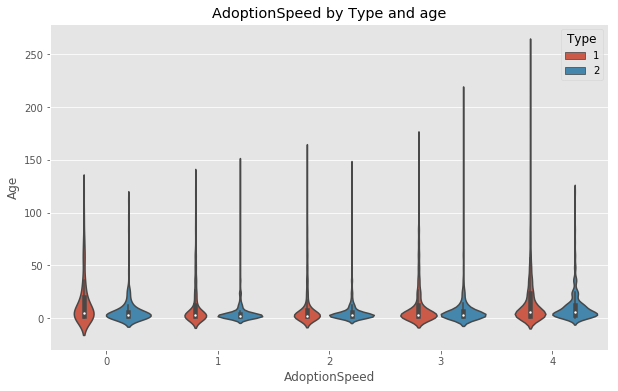

In [5]:
# AdoptionSpeed Vs Age
plt.figure(figsize=(30, 16));
with sns.axes_style(style='ticks'):
    a = sns.catplot("AdoptionSpeed", "Age", "Type", data=dfTrain, kind="box")
    a.set_axis_labels("AdoptionSpeed", "Age");

plt.figure(figsize=(10, 6));
sns.violinplot(x="AdoptionSpeed", y="Age", hue="Type", data=dfTrain);
plt.title('AdoptionSpeed by Type and age')

**2e. Pure Breed**

In [6]:
dfTrain['Pure_breed'] = 0
dfTrain.loc[dfTrain['Breed2'] == 0, 'Pure_breed'] = 1

print(f"Rate of pure breed pets in train data: {dfTrain['Pure_breed'].sum() * 100 / dfTrain['Pure_breed'].shape[0]:.4f}%.")


Rate of pure breed pets in train data: 71.7802%.


In [7]:
main_count = dfTrain['AdoptionSpeed'].value_counts(normalize=True).sort_index()
def prepare_plot_dict(df, col, main_count):
    """
    Preparing dictionary with data for plotting.
    
    I want to show how much higher/lower are the rates of Adoption speed for the current column comparing to base values (as described higher),
    At first I calculate base rates, then for each category in the column I calculate rates of Adoption speed and find difference with the base rates.
    
    """
    main_count = dict(main_count)
    plot_dict = {}
    for i in df[col].unique():
        val_count = dict(df.loc[df[col] == i, 'AdoptionSpeed'].value_counts().sort_index())

        for k, v in main_count.items():
            if k in val_count:
                plot_dict[val_count[k]] = ((val_count[k] / sum(val_count.values())) / main_count[k]) * 100 - 100
            else:
                plot_dict[0] = 0

    return plot_dict

def make_count_plot(df, x, hue='AdoptionSpeed', title='', main_count=main_count):
    """
    Plotting countplot with correct annotations.
    """
    g = sns.countplot(x=x, data=df, hue=hue);
    plt.title(f'AdoptionSpeed {title}');
    ax = g.axes

    plot_dict = prepare_plot_dict(df, x, main_count)

    for p in ax.patches:
        h = p.get_height() if str(p.get_height()) != 'nan' else 0
        text = f"{plot_dict[h]:.0f}%" if plot_dict[h] < 0 else f"+{plot_dict[h]:.0f}%"
        ax.annotate(text, (p.get_x() + p.get_width() / 2., h),
             ha='center', va='center', fontsize=11, color='green' if plot_dict[h] > 0 else 'red', rotation=0, xytext=(0, 10),
             textcoords='offset points')  
        
        

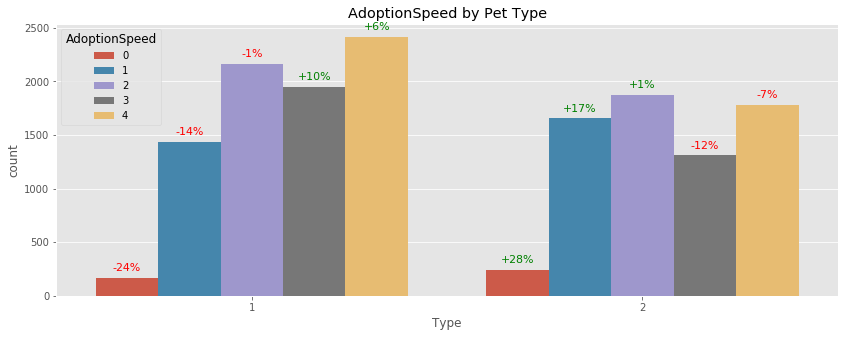

In [8]:
plt.figure(figsize=(14, 5));
make_count_plot(df=dfTrain, x='Type', title='by Pet Type')

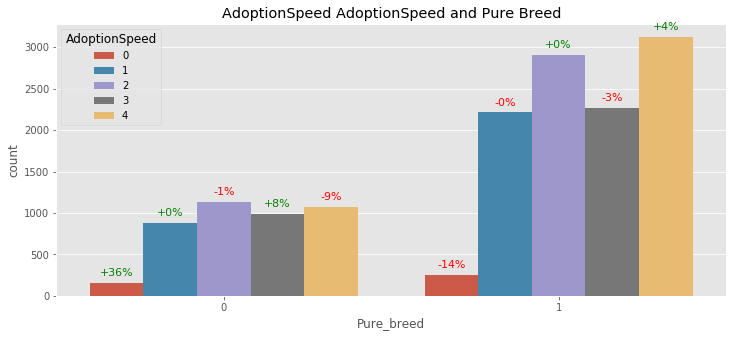

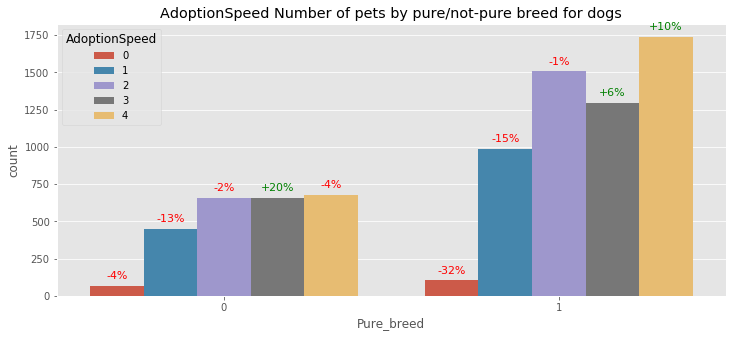

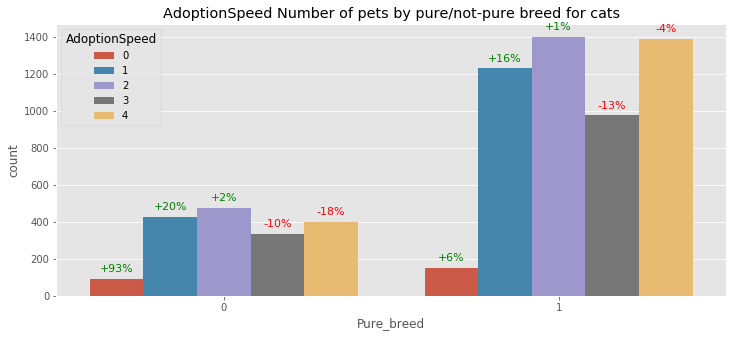

In [9]:
plt.figure(figsize=(12, 5));
make_count_plot(df=dfTrain, x='Pure_breed', title='AdoptionSpeed and Pure Breed')

plt.figure(figsize=(12, 5));
make_count_plot(df=dfTrain.loc[dfTrain['Type'] == 1], x='Pure_breed', title='Number of pets by pure/not-pure breed for dogs')

plt.figure(figsize=(12, 5));
make_count_plot(df=dfTrain.loc[dfTrain['Type'] == 2], x='Pure_breed', title='Number of pets by pure/not-pure breed for cats')



In [10]:
breeds_dict = {k: v for k, v in zip(breeds['BreedID'], breeds['BreedName'])}
dfTrain['Breed1_name'] = dfTrain['Breed1'].apply(lambda x: '_'.join(breeds_dict[x].split()) if x in breeds_dict else 'Unknown')
dfTrain['Breed2_name'] = dfTrain['Breed2'].apply(lambda x: '_'.join(breeds_dict[x]) if x in breeds_dict else '-')
(dfTrain['Breed1_name'] + '__' + dfTrain['Breed2_name']).value_counts().head(15)


Mixed_Breed__-                                                   4535
Domestic_Short_Hair__-                                           3058
Mixed_Breed__M_i_x_e_d_ _B_r_e_e_d                               1003
Domestic_Medium_Hair__-                                           984
Domestic_Short_Hair__D_o_m_e_s_t_i_c_ _S_h_o_r_t_ _H_a_i_r        264
Tabby__-                                                          247
Domestic_Long_Hair__-                                             178
Shih_Tzu__-                                                       149
Poodle__-                                                         121
Siamese__-                                                        120
Labrador_Retriever__M_i_x_e_d_ _B_r_e_e_d                         118
Golden_Retriever__-                                                94
Domestic_Medium_Hair__D_o_m_e_s_t_i_c_ _M_e_d_i_u_m_ _H_a_i_r      90
Terrier__M_i_x_e_d_ _B_r_e_e_d                                     85
Domestic_Medium_Hair

**2f.Gender**

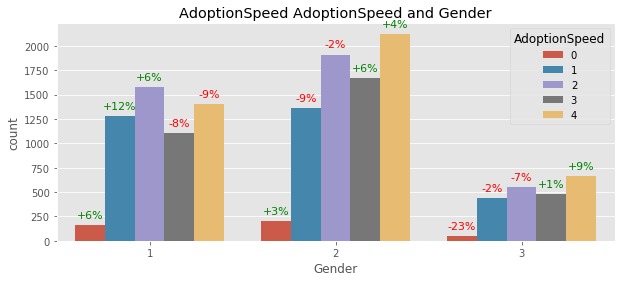

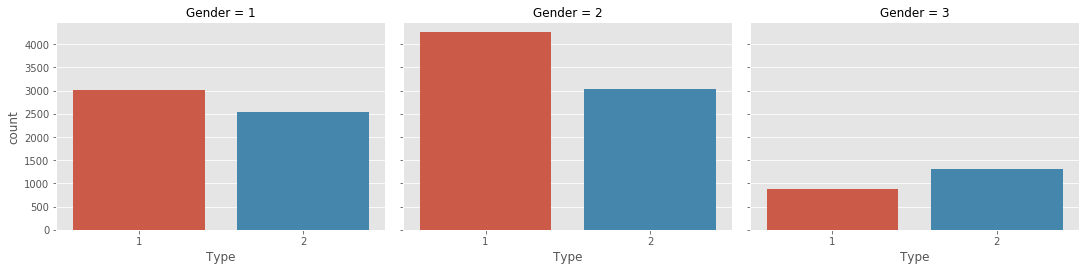

In [11]:
plt.figure(figsize=(10, 4));
make_count_plot(df=dfTrain, x='Gender',hue='AdoptionSpeed', title='AdoptionSpeed and Gender')


sns.factorplot('Type', col='Gender', data=dfTrain, kind='count');
plt.subplots_adjust(top=0.7)


**2g. Colors**

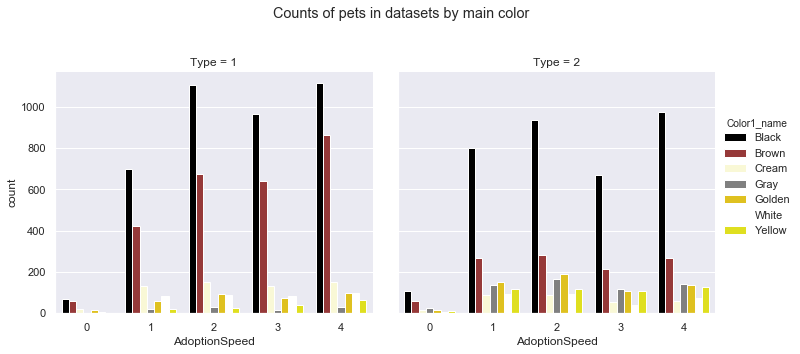

In [12]:

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set()

colors_dict = {k: v for k, v in zip(colors['ColorID'], colors['ColorName'])}
dfTrain['Color1_name'] = dfTrain['Color1'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
dfTrain['Color2_name'] = dfTrain['Color2'].apply(lambda x: colors_dict[x] if x in colors_dict else '')
dfTrain['Color3_name'] = dfTrain['Color3'].apply(lambda x: colors_dict[x] if x in colors_dict else '')

def make_factor_plot(df, x, col, title,  hue=None, ann=True, col_wrap=4):

    if hue:
        g = sns.factorplot(col, col=x, data=dfTrain, kind='count', col_wrap=col_wrap, hue=hue);
    else:
        g = sns.factorplot(col, col=x, data=dfTrain, kind='count', col_wrap=col_wrap);
    plt.subplots_adjust(top=0.9);
    plt.suptitle(title);
    ax = g.axes
    plot_dict = prepare_plot_dict(df, x, main_count)
    if ann:
        for a in ax:
            for p in a.patches:
                text = f"{plot_dict[p.get_height()]:.0f}%" if plot_dict[p.get_height()] < 0 else f"+{plot_dict[p.get_height()]:.0f}%"
                a.annotate(text, (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=11, color='green' if plot_dict[p.get_height()] > 0 else 'red', rotation=0, xytext=(0, 10),
                     textcoords='offset points')  

sns.factorplot('AdoptionSpeed', col='Type', data=dfTrain, kind='count', hue='Color1_name', palette=['Black', 'Brown', '#FFFDD0', 'Gray', 'Gold', 'White', 'Yellow']);
plt.subplots_adjust(top=0.8)
plt.suptitle('Counts of pets in datasets by main color');
       

**2h. Maturity Size**

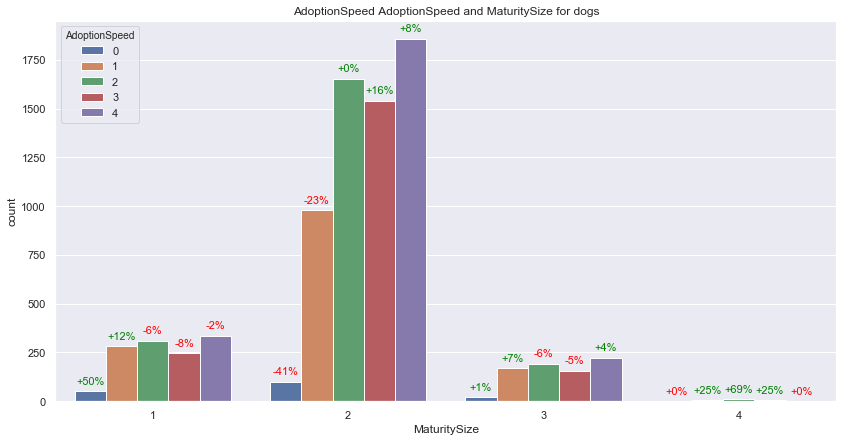

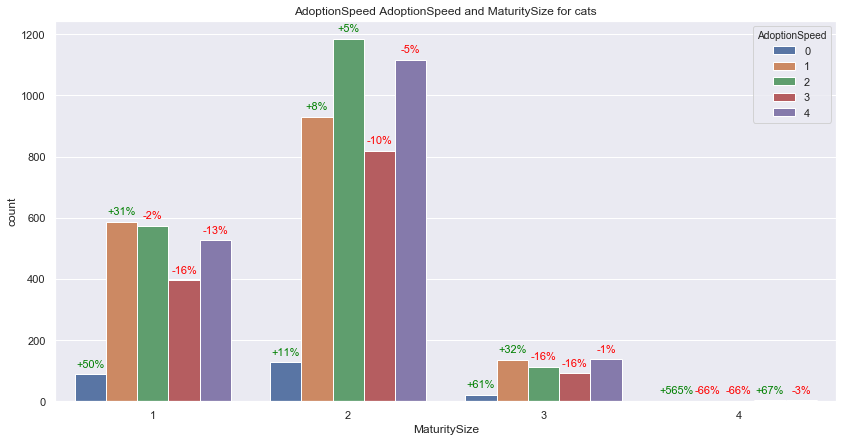

In [13]:
plt.figure(figsize=(14, 7));
make_count_plot(df=dfTrain.loc[dfTrain['Type'] == 1],x='MaturitySize',hue='AdoptionSpeed', title ='AdoptionSpeed and MaturitySize for dogs')

plt.figure(figsize=(14, 7));
make_count_plot(df=dfTrain.loc[dfTrain['Type'] == 2], x='MaturitySize',hue='AdoptionSpeed', title ='AdoptionSpeed and MaturitySize for cats')



**2i. Fur Length**

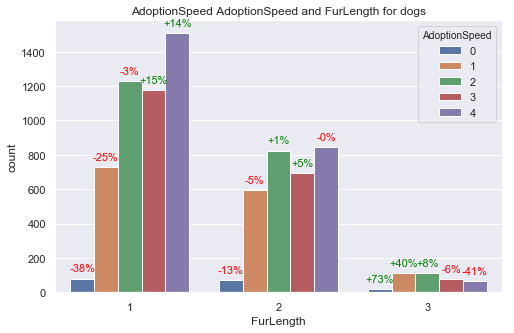

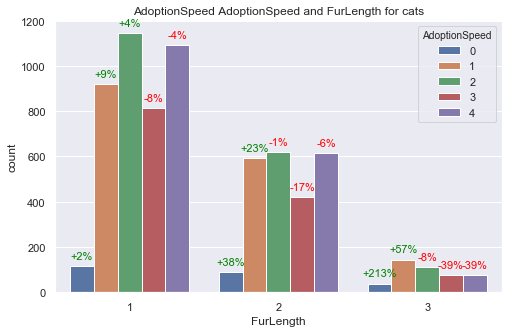

In [14]:

plt.figure(figsize=(8, 5));
make_count_plot(x='FurLength',hue='AdoptionSpeed',df=dfTrain.loc[dfTrain['Type'] == 1], title ='AdoptionSpeed and FurLength for dogs')


plt.figure(figsize=(8, 5));
make_count_plot(x='FurLength',hue='AdoptionSpeed',df=dfTrain.loc[dfTrain['Type'] == 2], title ='AdoptionSpeed and FurLength for cats')


**2j. Health**

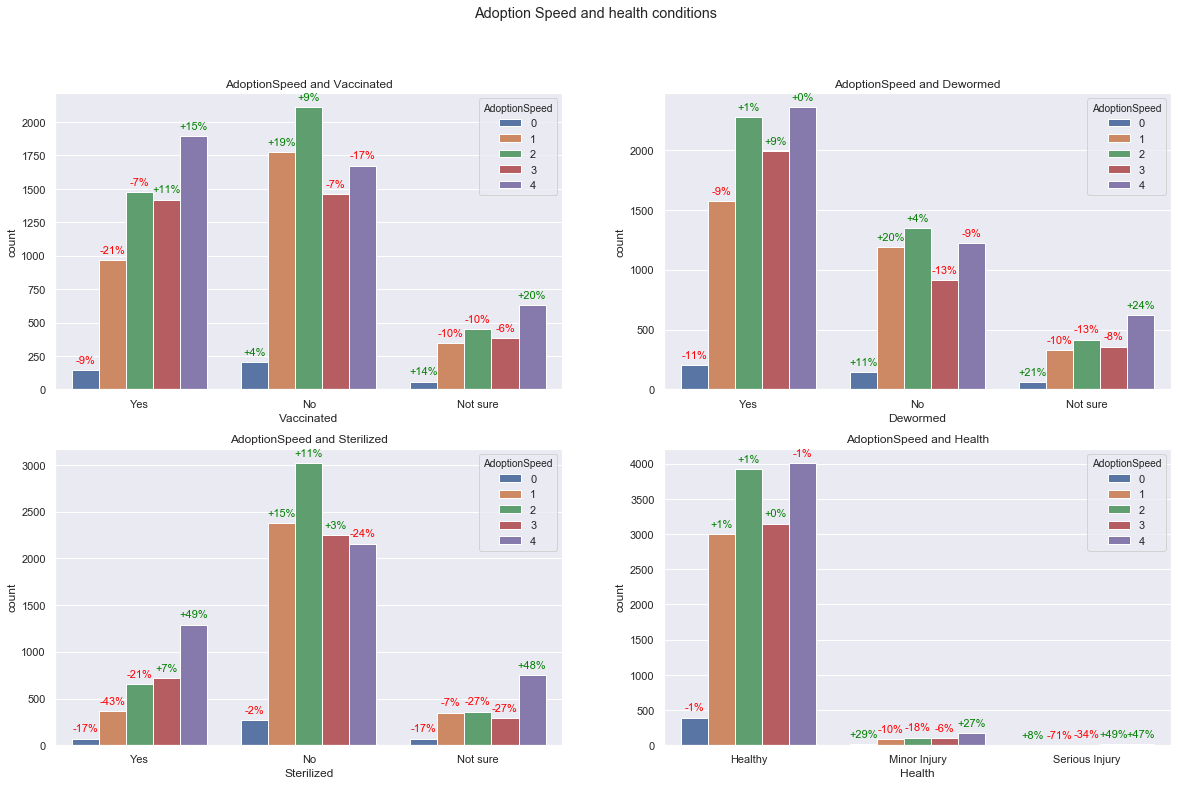

In [15]:
plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=dfTrain, x='Vaccinated', title='Vaccinated')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Vaccinated');

plt.subplot(2, 2, 2)
make_count_plot(df=dfTrain, x='Dewormed', title='Dewormed')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Dewormed');

plt.subplot(2, 2, 3)
make_count_plot(df=dfTrain, x='Sterilized', title='Sterilized')
plt.xticks([0, 1, 2], ['Yes', 'No', 'Not sure']);
plt.title('AdoptionSpeed and Sterilized');

plt.subplot(2, 2, 4)
make_count_plot(df=dfTrain, x='Health', title='Health')
plt.xticks([0, 1, 2], ['Healthy', 'Minor Injury', 'Serious Injury']);
plt.title('AdoptionSpeed and Health');

plt.suptitle('Adoption Speed and health conditions');

**2k. Fee**

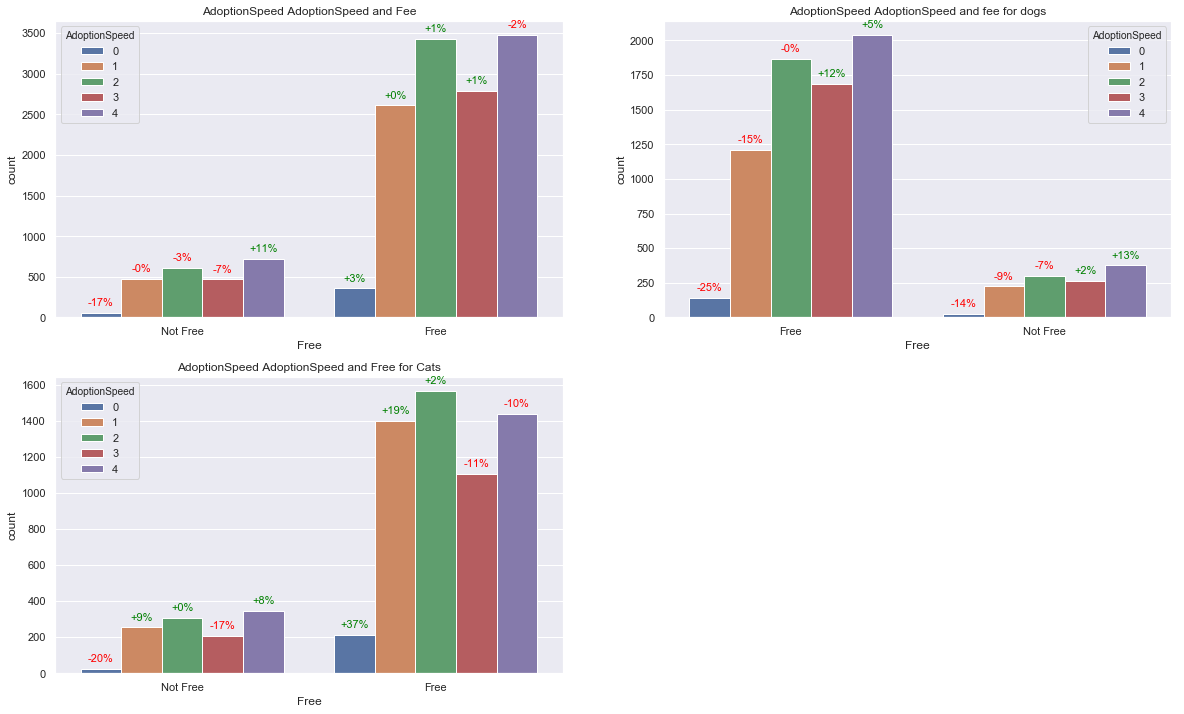

In [16]:
dfTrain['Free'] = dfTrain['Fee'].apply(lambda x: 'Free' if x == 0 else 'Not Free')

plt.figure(figsize=(20, 12));
plt.subplot(2, 2, 1)
make_count_plot(df=dfTrain, x='Free',hue='AdoptionSpeed', title='AdoptionSpeed and Fee')

plt.subplot(2, 2, 2)
make_count_plot(df=dfTrain.loc[dfTrain['Type'] == 1], x='Free', hue='AdoptionSpeed', title='AdoptionSpeed and fee for dogs')


plt.subplot(2, 2, 3)
make_count_plot(df=dfTrain.loc[dfTrain['Type'] == 2], x='Free',hue='AdoptionSpeed', title='AdoptionSpeed and Free for Cats')
           


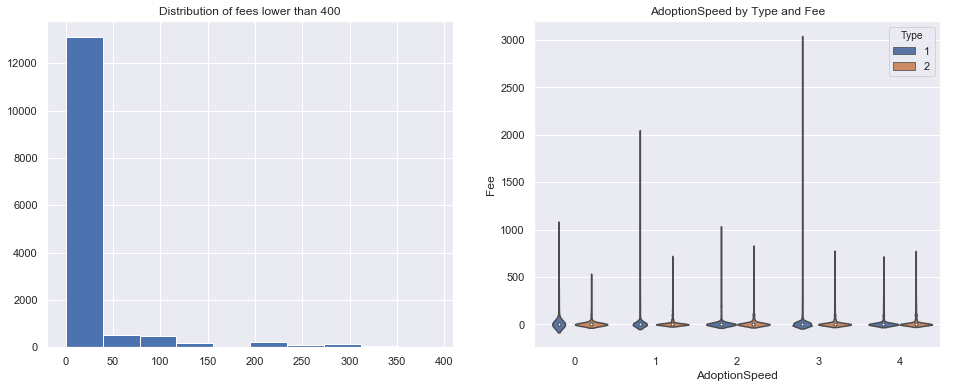

In [17]:
plt.figure(figsize=(16, 6));
plt.subplot(1, 2, 1)
plt.hist(dfTrain.loc[dfTrain['Fee'] < 400, 'Fee']);
plt.title('Distribution of fees lower than 400');

plt.subplot(1, 2, 2)
sns.violinplot(x="AdoptionSpeed", y="Fee", hue="Type", data=dfTrain);
plt.title('AdoptionSpeed by Type and Fee');

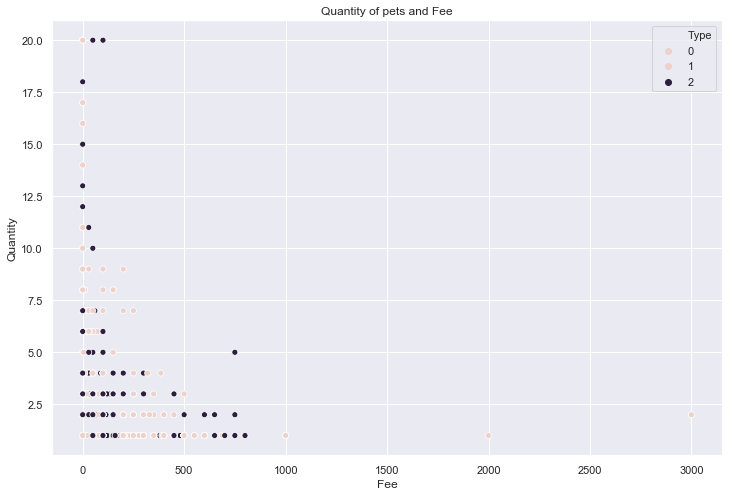

In [18]:
plt.figure(figsize=(12, 8));
sns.scatterplot(x="Fee", y="Quantity", hue="Type",data=dfTrain);
plt.title('Quantity of pets and Fee');

**2l. State**

In [19]:
states_dict = {k: v for k, v in zip(states['StateID'], states['StateName'])}
dfTrain['State_name'] = dfTrain['State'].apply(lambda x: '_'.join(states_dict[x].split()) if x in states_dict else 'Unknown')
dfTrain['State_name'].value_counts(normalize=True).head()

Selangor        0.581205
Kuala_Lumpur    0.256453
Pulau_Pinang    0.056226
Johor           0.033816
Perak           0.028013
Name: State_name, dtype: float64

In [20]:
dfTrain.head()


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,PhotoAmt,AdoptionSpeed,Pure_breed,Breed1_name,Breed2_name,Color1_name,Color2_name,Color3_name,Free,State_name
0,2,Nibble,3,299,0,1,1,7,0,1,...,1.0,2,1,Tabby,-,Black,White,,Not Free,Selangor
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,2.0,0,1,Domestic_Medium_Hair,-,Black,Brown,,Free,Kuala_Lumpur
2,1,Brisco,1,307,0,1,2,7,0,2,...,7.0,3,1,Mixed_Breed,-,Brown,White,,Free,Selangor
3,1,Miko,4,307,0,2,1,2,0,2,...,8.0,2,1,Mixed_Breed,-,Black,Brown,,Not Free,Kuala_Lumpur
4,1,Hunter,1,307,0,1,1,0,0,2,...,3.0,2,1,Mixed_Breed,-,Black,,,Free,Selangor


# 3. Begin Preprocessing
**3a. Bring in base datasets anda append columns from sentiment JSON**

In [4]:
#loading base data sets for preprocessing
dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

#function for bringing in sentiment data
def dfAddSentiment(split):
    newPath = initPath + '/'+split+'_sentiment/'
    tempList = []

    #cycle through JSON files and glean document sentiment and language
    for filename in os.listdir(newPath):
        if filename.endswith(".json"):
            with open(os.path.join(newPath, filename), encoding="utf8") as f:
                data = json.load(f)

            petID = os.path.splitext(filename)[0]
            row = [petID, data['documentSentiment']['magnitude'], data['documentSentiment']['score'], data['language']]
            tempList.append(row)
    
    labels = ['PetID', 'Desc_Magnitude', 'Desc_Score', 'Desc_Language']
    df = pd.DataFrame(tempList, columns=labels)
    
    #left join sentiment to base dataframes
    if split == 'train':
        dfBase = dfTrain
    elif split == 'test':
        dfBase = dfTest
    else:
        print('invalid function parameter')
        
    dfOut = pd.merge(dfBase, df, on='PetID', how='left')
    
    #move target variable to end in train dataset
    if split == 'train':
        colList = dfOut.columns.tolist()
        colList.remove('AdoptionSpeed')
        colList.append('AdoptionSpeed')
        dfOut = dfOut[colList]

    #drop description & RescuerID text column
    dfOut = dfOut.drop(['Name','Description','RescuerID','VideoAmt'], axis=1)
    
    return dfOut

dfTrain = dfAddSentiment('train')
dfTest = dfAddSentiment('test')

**3b. Basic Image Statistics**

In [5]:
import glob
from PIL import Image as IMG
from sys import platform

def getSize(filename):
    #filename = images_path + filename
    st = os.stat(filename)
    return st.st_size

def getDimensions(filename):
    #filename = images_path + filename
    img_size = IMG.open(filename).size
    return img_size 

def getImageStats(split):
    imagePath = initPath + '/'+split+'_images/'
    image_files = sorted(glob.glob(imagePath+'*.jpg'))
    
    df_imgs = pd.DataFrame(image_files, columns=['image_filename'])
   
    if platform == 'darwin': #check if running on mac
        imgs_pets = df_imgs['image_filename'].apply(lambda x: x.split('/')[-1].split('-')[0]) #PetID
    else:
        imgs_pets = df_imgs['image_filename'].apply(lambda x: x.split("\\")[-1].split('-')[0]) #PetID PC

    df_imgs = df_imgs.assign(PetID=imgs_pets)

    df_imgs['image_size'] = df_imgs['image_filename'].apply(getSize)
    df_imgs['temp_size'] = df_imgs['image_filename'].apply(getDimensions)
    df_imgs['width'] = df_imgs['temp_size'].apply(lambda x : x[0])
    df_imgs['height'] = df_imgs['temp_size'].apply(lambda x : x[1])
    df_imgs = df_imgs.drop(['temp_size'], axis=1)

    #aggregate to one row per pet
    aggs = {
        'image_size': ['min', 'max', 'mean', 'median', "sum"],
        'width': ['min', 'max', 'mean', 'median', "sum"],
        'height': ['min', 'max', 'mean', 'median', "sum"],
    }

    agg_imgs = df_imgs.groupby('PetID').agg(aggs)

    new_columns = [
        k + '_' + agg for k in aggs.keys() for agg in aggs[k]
    ]
    
    
    agg_imgs.columns = new_columns
    

    agg_imgs = agg_imgs.reset_index()
    
    #left join sentiment to base dataframes
    if split == 'train':
        dfBase = dfTrain
    elif split == 'test':
        dfBase = dfTest
    else:
        print('invalid function parameter')
        
    dfOut = pd.merge(dfBase, agg_imgs, on='PetID', how='left')
    
    #move target variable to end in train dataset
    if split == 'train':
        colList = dfOut.columns.tolist()
        colList.remove('AdoptionSpeed')
        colList.append('AdoptionSpeed')
        dfOut = dfOut[colList]
        
    return(dfOut)

dfTrain = getImageStats('train')
dfTest = getImageStats('test')


**3c. More complex image features**

In [6]:
from collections import defaultdict
from scipy.stats import itemfreq
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage import feature
from PIL import Image as IMG
import operator
import cv2


def color_analysis(img):
    # obtain the color palette of the image 
    palette = defaultdict(int)
    for pixel in img.getdata():
        palette[pixel] += 1
    
    # sort the colors present in the image 
    sorted_x = sorted(palette.items(), key=operator.itemgetter(1), reverse = True)
    
    light_shade, dark_shade, shade_count, pixel_limit = 0, 0, 0, 1000
    for i, x in enumerate(sorted_x[:pixel_limit]):
        if all(xx <= 20 for xx in x[0][:3]): ## dull : too much darkness 
            dark_shade += x[1]
        if all(xx >= 240 for xx in x[0][:3]): ## bright : too much whiteness 
            light_shade += x[1]
        shade_count += x[1]
        
    light_percent = round((float(light_shade)/shade_count)*100, 2)
    dark_percent = round((float(dark_shade)/shade_count)*100, 2)
    return light_percent, dark_percent

def perform_color_analysis(img):

    path = imagePath + img 
    im = IMG.open(path) #.convert("RGB")
    
    # cut the images into two halves as complete average may give bias results
    size = im.size
    halves = (size[0]/2, size[1]/2)
    im1 = im.crop((0, 0, size[0], halves[1]))
    im2 = im.crop((0, halves[1], size[0], size[1]))

    try:
        light_percent1, dark_percent1 = color_analysis(im1)
        light_percent2, dark_percent2 = color_analysis(im2)
    except Exception as e:
        light_percent1, dark_percent1 = -1, -1
        light_percent2, dark_percent2 = -1, -1

    light_percent = (light_percent1 + light_percent2)/2 
    dark_percent = (dark_percent1 + dark_percent2)/2 
    
    return dark_percent, light_percent

def average_pixel_width(img):
    path = imagePath + img 
    im = IMG.open(path)    
    im_array = np.asarray(im.convert(mode='L'))
    edges_sigma1 = feature.canny(im_array, sigma=3)
    apw = (float(np.sum(edges_sigma1)) / (im.size[0]*im.size[1]))
    return apw*100

def get_blurrness_score(image):
    path =  imagePath + image 
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    fm = cv2.Laplacian(image, cv2.CV_64F).var()
    return fm

def getImageDetail(split):
    
    imagePath = initPath + '/'+split+'_images/'
    
    imgs = os.listdir(imagePath)
    features = pd.DataFrame(data=imgs, columns=['image'])

    #keep only display image or the one ending in "-1"
    features = features.loc[['-1.' in x for x in features.image]]

    features['dullness_whiteness'] = features['image'].apply(lambda x : perform_color_analysis(x))
    features['dullness'] = features.dullness_whiteness.map(lambda x: x[0])
    features['whiteness'] = features.dullness_whiteness.map(lambda x: x[1])
    features['average_pixel_width'] = features['image'].apply(average_pixel_width)
    features['blurrness'] = features['image'].apply(get_blurrness_score)

    #create PetID from image name and drop image name and dullness_whiteness
    if platform == 'darwin': #check if running on mac
        imgs_pets2 = features['image'].apply(lambda x: x.split('/')[-1].split('-')[0]) #PetID
    else:
        imgs_pets2 = features['image'].apply(lambda x: x.split('\\')[-1].split('-')[0]) #PetID
        
    features.insert(0,'PetID',imgs_pets2)
    features = features.drop(['image','dullness_whiteness'], axis=1)
    
    #left join sentiment to base dataframes
    if split == 'train':
        dfBase = dfTrain
    elif split == 'test':
        dfBase = dfTest
    else:
        print('invalid function parameter')
        
    dfOut = pd.merge(dfBase, features, on='PetID', how='left')
    
    #move target variable to end in train dataset
    if split == 'train':
        colList = dfOut.columns.tolist()
        colList.remove('AdoptionSpeed')
        colList.append('AdoptionSpeed')
        dfOut = dfOut[colList]
        
    return(dfOut)

imagePath = initPath + '/train_images/'
dfTrain = getImageDetail('train')

# imagePath = initPath + '/test_images/'
# dfTest = getImageDetail('test')

**3d. Optional. Output to csv for review and copy dataframes**

In [7]:
dfTrain.to_csv('dfTrain.csv', sep='\t', encoding='utf-8', index=False, header=True)

#copy data frames in case cleaning goes wrong
dfTrainBackup = dfTrain[dfTrain.columns] 
dfTestBackup = dfTest[dfTest.columns] 

In [8]:
#reset data frames to backup if cleaning goes wrong
dfTrain = dfTrainBackup[dfTrainBackup.columns] 
dfTest = dfTestBackup[dfTestBackup.columns] 

# dfTrain = dfTrainBackup[dfTrainBackup.columns]


**4a. Check where nulls exist for clean-up**

In [9]:
dfTrain.isna().sum()

Type                     0
Age                      0
Breed1                   0
Breed2                   0
Gender                   0
Color1                   0
Color2                   0
Color3                   0
MaturitySize             0
FurLength                0
Vaccinated               0
Dewormed                 0
Sterilized               0
Health                   0
Quantity                 0
Fee                      0
State                    0
PetID                    0
PhotoAmt                 0
Desc_Magnitude         551
Desc_Score             551
Desc_Language          551
image_size_min         341
image_size_max         341
image_size_mean        341
image_size_median      341
image_size_sum         341
width_min              341
width_max              341
width_mean             341
width_median           341
width_sum              341
height_min             341
height_max             341
height_mean            341
height_median          341
height_sum             341
d

**4b. Check column cardinality for categorical columns (before we do one hot encoding)**

In [10]:
uniqueType = len(dfTrain.Type.unique())
uniqueBreed1 = len(dfTrain.Breed1.unique())
uniqueBreed2 = len(dfTrain.Breed2.unique())
uniqueGender = len(dfTrain.Gender.unique())
uniqueColor1 = len(dfTrain.Color1.unique())
uniqueColor2 = len(dfTrain.Color2.unique())
uniqueColor3 = len(dfTrain.Color3.unique())
uniqueMaturitySize = len(dfTrain.MaturitySize.unique())
uniqueFurLength = len(dfTrain.FurLength.unique())
uniqueVaccinated = len(dfTrain.Vaccinated.unique())
uniqueDewormed = len(dfTrain.Dewormed.unique())
uniqueSterilized = len(dfTrain.Sterilized.unique())
uniqueHealth = len(dfTrain.Health.unique())
uniqueState = len(dfTrain.State.unique())
uniqueDesc_Language = len(dfTrain.Desc_Language.unique())

colList = ['Type', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2', 'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 'Sterilized', 'Health', 'State',  'Desc_Language']  # Removed RescuerID
data = []
for col in colList:
    val = eval('unique'+col)
    data.append([col,val])
    
dfUniques = pd.DataFrame(data, columns=['column','cardinality'])

print(dfUniques)


           column  cardinality
0            Type            2
1          Breed1          176
2          Breed2          135
3          Gender            3
4          Color1            7
5          Color2            7
6          Color3            6
7    MaturitySize            4
8       FurLength            3
9      Vaccinated            3
10       Dewormed            3
11     Sterilized            3
12         Health            3
13          State           14
14  Desc_Language            5


**5a. Preprocess data - impute values, encode categorical variables (label, binary, and one hot)**

In [11]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import category_encoders as ce
      
def imputeMean(df,col):
    df[col].fillna(df[col].mean(), inplace=True)
    return df

def imputeMode(df,col):
    df[col].fillna(df[col].mode()[0], inplace=True)
    return df

def imputeZero(df,col):
    df[col].fillna(0)
    return df

def labelEncode(df,col):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    return df

def oneHotEncodeMult(df,cols):   
    #create one column for each unique member of col, removing the first one
    dfOut = pd.get_dummies(df, prefix=cols, columns = cols, drop_first=True)
    return dfOut

def binaryEncodeMult(df,cols):
    ce_bin = ce.BinaryEncoder(cols=cols)
    dfOut = ce_bin.fit_transform(df)
    return dfOut

def preprocess(df):
    #drop id column and photo dimension sums
    df = df.drop(['PetID','width_sum','height_sum','image_size_sum'], axis=1)

    #impute nulls with mean
    numCols = ['Desc_Magnitude','Desc_Score','image_size_min','image_size_max','image_size_mean','image_size_median','width_min','width_max','width_mean','width_median','height_min','height_max','height_mean','height_median','dullness','whiteness','average_pixel_width','blurrness']

    #impute nulls with mode
    catCols = ['Desc_Language']

    for col in numCols:
        df = imputeMean(df,col)

    for col in catCols:
        df = imputeMode(df,col)

    labelEncodeCols = ['Desc_Language']
    # repeat this for all columns that require label encoding
    for col in labelEncodeCols:
        df = labelEncode(df,col)

    oneHotEncodeCols = ['Desc_Language','State','Health','Sterilized','Dewormed','Vaccinated','FurLength','MaturitySize','Color3','Color2','Color1','Gender','Type']
    df = oneHotEncodeMult(df,oneHotEncodeCols)
    
    #these columns have high cardinality, ranging from 135-9061 in our train dataset and would be detrimental to one hot encode because of the curse of dimensionality
    
    highCardCols = ['Breed2','Breed1']
    # use binary encoding for high cardinality dimensions so we do not end up with 1000s of dimension columns
    # curse of dimensionality
    df = binaryEncodeMult(df,highCardCols)
    
    
    return df

#reset dataframes to "backup" before running each time. this can be removed once cell is finalized
# dfTrain = dfTrainBackup
# dfTest = dfTestBackup

#combine into one dataset for pre-processing with indicator column
dfTrain['train']=1
dfTest['train']=0
dfTest['AdoptionSpeed'] = np.nan
dfCombined = pd.concat([dfTrain, dfTest], sort=True)

#preprocess dataset together so that columns are aligned
dfCombined = preprocess(dfCombined)

#separate back into two dataframes
dfTrain = dfCombined[dfCombined.train == 1]
dfTest = dfCombined[dfCombined.train == 0]

#drop indicator column
dfTrain = dfTrain.drop('train', axis = 1)
dfTest = dfTest.drop('train', axis = 1)

# Moving AdoptionSpeed to the end of the Dataframe
dfTrain = dfTrain[[feature for feature in dfTrain if feature not in ['AdoptionSpeed']] + ['AdoptionSpeed']]
dfTest = dfTest[[feature for feature in dfTest if feature not in ['AdoptionSpeed']] + ['AdoptionSpeed']]

#show resulting shape
print("dfTrain shape: " + str(dfTrain.shape))
print("dfTest shape: " + str(dfTest.shape))

dfTrain.to_csv('dfTrain.csv', sep='\t', encoding='utf-8', index=False, header=True)
dfTest.to_csv('dfTest.csv', sep='\t', encoding='utf-8', index=False, header=True)

dfTrain shape: (14993, 90)
dfTest shape: (3948, 90)


**5b. Check for nulls after fixing**

In [12]:
dfTrain.isna().sum()

Breed2_0               0
Breed2_1               0
Breed2_2               0
Breed2_3               0
Breed2_4               0
Breed2_5               0
Breed2_6               0
Breed2_7               0
Breed2_8               0
Breed1_0               0
Breed1_1               0
Breed1_2               0
Breed1_3               0
Breed1_4               0
Breed1_5               0
Breed1_6               0
Breed1_7               0
Breed1_8               0
Age                    0
Desc_Magnitude         0
Desc_Score             0
Fee                    0
PhotoAmt               0
Quantity               0
average_pixel_width    0
blurrness              0
dullness               0
height_max             0
height_mean            0
height_median          0
                      ..
Dewormed_2             0
Dewormed_3             0
Vaccinated_2           0
Vaccinated_3           0
FurLength_2            0
FurLength_3            0
MaturitySize_2         0
MaturitySize_3         0
MaturitySize_4         0


**5c. Final Features**

In [13]:
#Final selected features 
dfTrain.columns

Index(['Breed2_0', 'Breed2_1', 'Breed2_2', 'Breed2_3', 'Breed2_4', 'Breed2_5',
       'Breed2_6', 'Breed2_7', 'Breed2_8', 'Breed1_0', 'Breed1_1', 'Breed1_2',
       'Breed1_3', 'Breed1_4', 'Breed1_5', 'Breed1_6', 'Breed1_7', 'Breed1_8',
       'Age', 'Desc_Magnitude', 'Desc_Score', 'Fee', 'PhotoAmt', 'Quantity',
       'average_pixel_width', 'blurrness', 'dullness', 'height_max',
       'height_mean', 'height_median', 'height_min', 'image_size_max',
       'image_size_mean', 'image_size_median', 'image_size_min', 'whiteness',
       'width_max', 'width_mean', 'width_median', 'width_min',
       'Desc_Language_1', 'Desc_Language_2', 'Desc_Language_3', 'State_41325',
       'State_41326', 'State_41327', 'State_41330', 'State_41332',
       'State_41335', 'State_41336', 'State_41342', 'State_41345',
       'State_41361', 'State_41367', 'State_41401', 'State_41415', 'Health_2',
       'Health_3', 'Sterilized_2', 'Sterilized_3', 'Dewormed_2', 'Dewormed_3',
       'Vaccinated_2', 'Vaccinated

# ALGORITHMS - MODELS
**6a. Loading Data into X and y**

In [14]:
# Loading the dataset
X = dfTrain.iloc[:,:-1].values
y = dfTrain.iloc[:,-1].values                      


**6b. Backward Elimination**

In [15]:
#Backward Elimation of features

import statsmodels.formula.api as sm

def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        obj_OLS = sm.OLS(y, x).fit()
        maxVar = max(obj_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (obj_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    obj_OLS.summary()
    return x

SL = 0.05
X_sig = X[:,:]
X_Modeled = backwardElimination(X_sig, SL)

print(X_Modeled.shape)

(14993, 49)


**6c. Splitting the data into Training Set and Test Set**

In [16]:
# Splitting the data into Training Set and Test Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


# Splitting the data into Training Set and Test Set 
from sklearn.model_selection import train_test_split
X_sig_train, X_sig_test, y_sig_train, y_sig_test = train_test_split(X_Modeled, y, test_size=0.2,random_state=0)

**6d. Normalizing**

In [17]:
# Normalizing the features
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

X_sig_train =  sc_X.fit_transform(X_sig_train)
X_sig_test =  sc_X.transform(X_sig_test)

 **7a. Applying PCA**

In [18]:
#Applying PCA wih all the features
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=None)
X_train_pca = pcaObj.fit_transform(X_train)
X_test_pca = pcaObj.transform(X_test)
components_variance = pcaObj.explained_variance_ratio_
components_variance


array([8.68392842e-02, 4.56206305e-02, 3.85758607e-02, 3.01291527e-02,
       2.81453975e-02, 2.43914252e-02, 2.29469418e-02, 2.12351814e-02,
       2.07014662e-02, 1.99765842e-02, 1.85754350e-02, 1.77984839e-02,
       1.71482926e-02, 1.64566892e-02, 1.56654533e-02, 1.46954361e-02,
       1.42741953e-02, 1.38921003e-02, 1.35174153e-02, 1.33890120e-02,
       1.32728115e-02, 1.29837111e-02, 1.27609404e-02, 1.25133371e-02,
       1.24608277e-02, 1.23471637e-02, 1.22780399e-02, 1.22314769e-02,
       1.20604793e-02, 1.19746612e-02, 1.19104228e-02, 1.17381858e-02,
       1.16954889e-02, 1.16857454e-02, 1.15415031e-02, 1.14438718e-02,
       1.13512702e-02, 1.12822350e-02, 1.12171222e-02, 1.11013857e-02,
       1.10533768e-02, 1.09777913e-02, 1.09026814e-02, 1.06736952e-02,
       1.06420111e-02, 1.03872880e-02, 1.03303877e-02, 1.00685636e-02,
       9.94622911e-03, 9.63991479e-03, 9.51147764e-03, 9.35493574e-03,
       9.18521479e-03, 8.64884319e-03, 8.53325830e-03, 8.34679646e-03,
      

In [19]:
#Applying PCA wih backward elimination the features
from sklearn.decomposition import PCA
pcaObj_be = PCA(n_components=None)
X_train_pca_be = pcaObj_be.fit_transform(X_sig_train)
X_test_pca_be = pcaObj_be.transform(X_sig_test)
components_variance = pcaObj_be.explained_variance_ratio_
components_variance


array([0.06590749, 0.05892551, 0.05268957, 0.04114458, 0.03996514,
       0.03619027, 0.03130952, 0.0279624 , 0.02694031, 0.02607145,
       0.02470697, 0.02389678, 0.02365144, 0.02279871, 0.02214203,
       0.02173875, 0.02119726, 0.02087088, 0.02073671, 0.02046601,
       0.0203668 , 0.02017333, 0.01944595, 0.01910923, 0.01885081,
       0.01874919, 0.01845461, 0.0180989 , 0.01759465, 0.01723592,
       0.01671692, 0.01642886, 0.01607035, 0.01506546, 0.01455107,
       0.01433661, 0.01221609, 0.01187775, 0.01142063, 0.00890769,
       0.00814415, 0.00770372, 0.00721567, 0.00646165, 0.00462972,
       0.00433128, 0.00380454, 0.00253343, 0.00019326])

**7b. Applying LDA**

In [20]:
#Applying LDA with all the features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=None)
X_train_lda = ldaObj.fit_transform(X_train,y_train)
X_test_lda = ldaObj.transform(X_test)

In [21]:
#Applying LDA with backward elimination features
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj_be = LDA(n_components=None)
X_train_lda_be = ldaObj_be.fit_transform(X_sig_train,y_sig_train)
X_test_lda_be = ldaObj_be.transform(X_sig_test)

**7c. Applying Kernel PCA**

In [ ]:
#Applying Kernel PCA with all the features
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=None, kernel='rbf')
X_train_kpca = kernelPCAObj.fit_transform(X_train)
X_test_kpca = kernelPCAObj.transform(X_test)

In [ ]:
#Applying Kernel PCA with backward elimination features
from sklearn.decomposition import KernelPCA
kernelPCAObj_be = KernelPCA(n_components=None, kernel='rbf')
X_train_kpca_be = kernelPCAObj_be.fit_transform(X_sig_train)
X_test_kpca_be = kernelPCAObj_be.transform(X_sig_test)

**8a. Visualize using Logistic Regression after applying PCA on 2 features**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

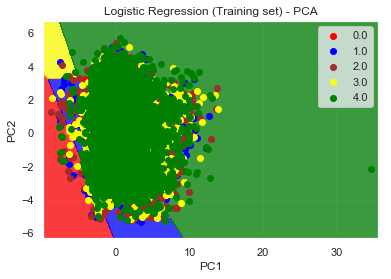

In [41]:
#Applying PCA wih 2 features to visualize
from sklearn.decomposition import PCA
pcaObj = PCA(n_components=2)
X_train_pca_2 = pcaObj.fit_transform(X_train)
X_test_pca_2 = pcaObj.transform(X_test)

# Fitting Logistic Regression to PCA Traning Set with 2 features
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=42)
classifierObj.fit(X_train_pca_2, y_train)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_pca_2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'brown','yellow','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'blue','brown','yellow','green'))(i), label = j)
plt.title('Logistic Regression (Training set) - PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**8b. Visualize using Logistic Regression after applying LDA on 2 features**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

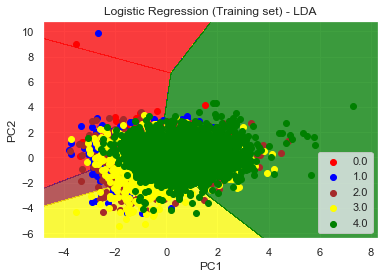

In [42]:
#Applying LDA with 2 features for visualizing
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
ldaObj = LDA(n_components=2)
X_train_lda_2 = ldaObj.fit_transform(X_train,y_train)
X_test_lda_2 = ldaObj.transform(X_test)

# Fitting Logistic Regression to LDA Traning Set with 2 features
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=42)
classifierObj.fit(X_train_lda_2, y_train)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_lda_2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'brown','yellow','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'blue','brown','yellow','green'))(i), label = j)
plt.title('Logistic Regression (Training set) - LDA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**8c. Visualize using Logistic Regression after applying Kernel PCA on 2 features**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

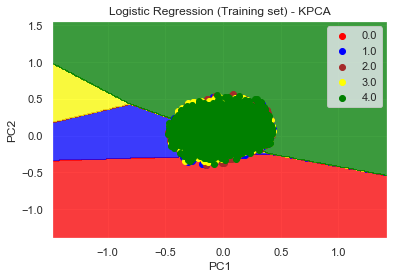

In [43]:
#Applying Kernel PCA with 2 features for visualizing
from sklearn.decomposition import KernelPCA
kernelPCAObj = KernelPCA(n_components=2, kernel='rbf')
X_train_kpca_2 = kernelPCAObj.fit_transform(X_train)
X_test_kpca_2 = kernelPCAObj.transform(X_test)


# Fitting Logistic Regression to Kernel PCA Traning Set with 2 features
from sklearn.linear_model import LogisticRegression
classifierObj = LogisticRegression(random_state=0)
classifierObj.fit(X_train_kpca_2, y_train)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train_kpca_2, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifierObj.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75, cmap = ListedColormap(('red', 'blue', 'brown','yellow','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
        c = ListedColormap(('red', 'blue','brown','yellow','green'))(i), label = j)
plt.title('Logistic Regression (Training set) - KPCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

**9a. Model - Logistic Regression, Compare score on PCA, LDA and Kernel PCA applied features**

In [44]:
#Logistic Regression

#Fitting Logistic Regression to PCA Traning Set with All features
from sklearn.linear_model import LogisticRegression
classifierObj_pca = LogisticRegression(multi_class='auto',random_state=42)
classifierObj_pca.fit(X_train_pca, y_train)

#Fitting Logistic Regression to LDA Traning Set with All features
classifierObj_lda = LogisticRegression(multi_class='auto',random_state=42)
classifierObj_lda.fit(X_train_lda, y_train)

#Fitting Logistic Regression to Kernel PCA Traning Set with All features
classifierObj_kpca = LogisticRegression(multi_class='auto',random_state=42)
classifierObj_kpca.fit(X_train_kpca, y_train)

############################

#Fitting Logistic Regression to PCA Traning Set with backward elimination features
classifierObj_pca_be = LogisticRegression(multi_class='auto',random_state=42)
classifierObj_pca_be.fit(X_train_pca_be, y_sig_train)

#Fitting Logistic Regression to LDA Traning Set with backward elimination  features
classifierObj_lda_be = LogisticRegression(multi_class='auto',random_state=42)
classifierObj_lda_be.fit(X_train_lda_be, y_sig_train)

#Fitting Logistic Regression to Kernel PCA Traning Set with backward elimination features
classifierObj_kpca_be = LogisticRegression(multi_class='auto',random_state=42)
classifierObj_kpca_be.fit(X_train_kpca_be, y_sig_train)


#Scores
print('Score using PCA with all features: ',classifierObj_pca.score(X_test_pca, y_test))
print('Score using LDA with all features: ',classifierObj_lda.score(X_test_lda, y_test))
print('Score using Kernel PCA with all features: ',classifierObj_kpca.score(X_test_kpca, y_test))


print('Score using PCA with backward elimination features: ',classifierObj_pca_be.score(X_test_pca_be, y_sig_test))
print('Score using LDA with backward elimination features: ',classifierObj_lda_be.score(X_test_lda_be, y_sig_test))
print('Score using Kernel PCA with backward elimination features: ',classifierObj_kpca_be.score(X_test_kpca_be, y_sig_test))



Score using PCA with all features:  0.3694564854951651
Score using LDA with all features:  0.3687895965321774
Score using Kernel PCA with all features:  0.373457819273091
Score using PCA with backward elimination features:  0.36845615205068355
Score using LDA with backward elimination features:  0.3631210403467823
Score using Kernel PCA with backward elimination features:  0.3781260420140047


In [45]:
# Confusion Matrix for highest accuracy method in Logistic Regression Model

from sklearn.metrics import confusion_matrix
y_pred_lr = classifierObj_kpca_be.predict(X_test_kpca_be)
cm_lr = confusion_matrix(y_sig_test,y_pred_lr)
print(cm_lr)


[[  0  26  21   7  22]
 [  0 186 249  45 162]
 [  0 120 313 102 263]
 [  0  97 223 119 217]
 [  0  81 166  64 516]]


**9b. Model - Decision Tree, Compare score on PCA, LDA and Kernel PCA applied features**

In [46]:
#Decision Tree

#Fitting Decision Tree to PCA Traning Set with All features
from sklearn.tree import DecisionTreeClassifier
classifierObj_pca = DecisionTreeClassifier(criterion='entropy')
classifierObj_pca.fit(X_train_pca, y_train)

#Fitting Decision Tree to LDA Traning Set with All features
classifierObj_lda = DecisionTreeClassifier(criterion='entropy')
classifierObj_lda.fit(X_train_lda, y_train)

#Fitting Decision Tree to Kernel PCA Traning Set with All features
classifierObj_kpca = DecisionTreeClassifier(criterion='entropy')
classifierObj_kpca.fit(X_train_kpca, y_train)

############################

#Fitting Decision Tree to PCA Traning Set with backward elimination features
classifierObj_pca_be = DecisionTreeClassifier(criterion='entropy')
classifierObj_pca_be.fit(X_train_pca_be, y_sig_train)

#Fitting Decision Tree to LDA Traning Set with backward elimination  features
classifierObj_lda_be = DecisionTreeClassifier(criterion='entropy')
classifierObj_lda_be.fit(X_train_lda_be, y_sig_train)

#Fitting Decision Tree to Kernel PCA Traning Set with backward elimination features
classifierObj_kpca_be = DecisionTreeClassifier(criterion='entropy')
classifierObj_kpca_be.fit(X_train_kpca_be, y_sig_train)

#Scores
print('Score using PCA with all features: ',classifierObj_pca.score(X_test_pca, y_test))
print('Score using LDA with all features: ',classifierObj_lda.score(X_test_lda, y_test))
print('Score using Kernel PCA with all features: ',classifierObj_kpca.score(X_test_kpca, y_test))


print('Score using PCA with backward elimination features: ',classifierObj_pca_be.score(X_test_pca_be, y_sig_test))
print('Score using LDA with backward elimination features: ',classifierObj_lda_be.score(X_test_lda_be, y_sig_test))
print('Score using Kernel PCA with backward elimination features: ',classifierObj_kpca_be.score(X_test_kpca_be, y_sig_test))

Score using PCA with all features:  0.29676558852950985
Score using LDA with all features:  0.2847615871957319
Score using Kernel PCA with all features:  0.2744248082694231
Score using PCA with backward elimination features:  0.3064354784928309
Score using LDA with backward elimination features:  0.2900966988996332
Score using Kernel PCA with backward elimination features:  0.26042014004668224


In [47]:
# Confusion Matrix for highest accuracy method in Decision Tree Model

from sklearn.metrics import confusion_matrix
y_pred_dt = classifierObj_pca.predict(X_test_pca)
cm_dt = confusion_matrix(y_test,y_pred_dt)
print(cm_dt)


[[  6  21  19  12  18]
 [ 16 163 174 137 152]
 [ 19 151 266 176 186]
 [ 14 138 193 161 150]
 [ 23 133 205 172 294]]


**9c. Model - Naive Bayes, Compare score on PCA, LDA and Kernel PCA applied features**

In [48]:
#Naive Bayes

#Fitting Naive Bayes to PCA Traning Set with All features
from sklearn.naive_bayes import GaussianNB
classifierObj_pca = GaussianNB()
classifierObj_pca.fit(X_train_pca, y_train)

#Fitting Naive Bayes to LDA Traning Set with All features
classifierObj_lda = GaussianNB()
classifierObj_lda.fit(X_train_lda, y_train)

#Fitting Naive Bayes to Kernel PCA Traning Set with All features
classifierObj_kpca = GaussianNB()
classifierObj_kpca.fit(X_train_kpca, y_train)

############################

#Fitting Naive Bayes to PCA Traning Set with backward elimination features
classifierObj_pca_be = GaussianNB()
classifierObj_pca_be.fit(X_train_pca_be, y_sig_train)

#Fitting Naive Bayes to LDA Traning Set with backward elimination  features
classifierObj_lda_be = GaussianNB()
classifierObj_lda_be.fit(X_train_lda_be, y_sig_train)

#Fitting Naive Bayes to Kernel PCA Traning Set with backward elimination features
classifierObj_kpca_be = GaussianNB()
classifierObj_kpca_be.fit(X_train_kpca_be, y_sig_train)

#Scores
print('Score using PCA with all features:',classifierObj_pca.score(X_test_pca, y_test))
print('Score using LDA with all features:',classifierObj_lda.score(X_test_lda, y_test))
print('Score using Kernel PCA with all features:',classifierObj_kpca.score(X_test_kpca, y_test))


print('Score using PCA with backward elimination features:',classifierObj_pca_be.score(X_test_pca_be, y_sig_test))
print('Score using LDA with backward elimination features:',classifierObj_lda_be.score(X_test_lda_be, y_sig_test))
print('Score using Kernel PCA with backward elimination features:',classifierObj_kpca_be.score(X_test_kpca_be, y_sig_test))


Score using PCA with all features: 0.2740913637879293
Score using LDA with all features: 0.3647882627542514
Score using Kernel PCA with all features: 0.22207402467489162
Score using PCA with backward elimination features: 0.2784261420473491
Score using LDA with backward elimination features: 0.3627875958652884
Score using Kernel PCA with backward elimination features: 0.23841280426808936


In [49]:
# Confusion Matrix for highest accuracy method in Naive Bayes Model

from sklearn.metrics import confusion_matrix
y_pred_nb = classifierObj_lda.predict(X_test_lda)
cm_nb = confusion_matrix(y_test,y_pred_nb)
print(cm_nb)

[[  3  19  35   2  17]
 [ 11 164 327  29 111]
 [ 14 103 405  65 211]
 [  8  82 287 105 174]
 [  8  76 269  57 417]]


**9d. Model - Random Forest, Compare score on PCA, LDA and Kernel PCA applied features**

In [50]:
#Random Forest

#Fitting Random Forest to PCA Traning Set with All features
from sklearn.ensemble import RandomForestClassifier
classifierObj_pca = RandomForestClassifier(n_estimators=25,criterion='entropy')
classifierObj_pca.fit(X_train_pca, y_train)

#Fitting Random Forest to LDA Traning Set with All features
classifierObj_lda = RandomForestClassifier(n_estimators=25,criterion='entropy')
classifierObj_lda.fit(X_train_lda, y_train)

#Fitting Random Forest to Kernel PCA Traning Set with All features
classifierObj_kpca = RandomForestClassifier(n_estimators=25,criterion='entropy')
classifierObj_kpca.fit(X_train_kpca, y_train)

############################

#Fitting Random Forest to PCA Traning Set with backward elimination features
classifierObj_pca_be = RandomForestClassifier(n_estimators=25,criterion='entropy')
classifierObj_pca_be.fit(X_train_pca_be, y_sig_train)

#Fitting Random Forest to LDA Traning Set with backward elimination  features
classifierObj_lda_be = RandomForestClassifier(n_estimators=25,criterion='entropy')
classifierObj_lda_be.fit(X_train_lda_be, y_sig_train)

#Fitting Random Forest to Kernel PCA Traning Set with backward elimination features
classifierObj_kpca_be = RandomForestClassifier(n_estimators=25,criterion='entropy')
classifierObj_kpca_be.fit(X_train_kpca_be, y_sig_train)

#Scores
print('Score using PCA with all features:',classifierObj_pca.score(X_test_pca, y_test))
print('Score using LDA with all features:',classifierObj_lda.score(X_test_lda, y_test))
print('Score using Kernel PCA with all features:',classifierObj_kpca.score(X_test_kpca, y_test))


print('Score using PCA with backward elimination features:',classifierObj_pca_be.score(X_test_pca_be, y_sig_test))
print('Score using LDA with backward elimination features:',classifierObj_lda_be.score(X_test_lda_be, y_sig_test))
print('Score using Kernel PCA with backward elimination features:',classifierObj_kpca_be.score(X_test_kpca_be, y_sig_test))

Score using PCA with all features: 0.3411137045681894
Score using LDA with all features: 0.3264421473824608
Score using Kernel PCA with all features: 0.2527509169723241
Score using PCA with backward elimination features: 0.3451150383461154
Score using LDA with backward elimination features: 0.34244748249416473
Score using Kernel PCA with backward elimination features: 0.27342447482494164


In [51]:
# Confusion Matrix for highest accuracy method in Random Forest Model

from sklearn.metrics import confusion_matrix
y_pred_rf = classifierObj_pca_be.predict(X_test_pca_be)
cm_rf = confusion_matrix(y_test,y_pred_rf)
cm_rf

array([[  4,  26,  19,   7,  20],
       [  1, 214, 208,  84, 135],
       [  1, 182, 274, 123, 218],
       [  1, 122, 217, 142, 174],
       [  3, 103, 212, 108, 401]], dtype=int64)

**9e. Model - SVM, Compare score on PCA, LDA and Kernel PCA applied features**

In [52]:
#SVM

#Fitting SVM to PCA Traning Set with All features
from sklearn.svm import SVC
classifierObj_pca = SVC(kernel='linear')
classifierObj_pca.fit(X_train_pca, y_train)

#Fitting SVM to LDA Traning Set with All features
classifierObj_lda = SVC(kernel='linear')
classifierObj_lda.fit(X_train_lda, y_train)

#Fitting SVM to Kernel PCA Traning Set with All features
classifierObj_kpca = SVC(kernel='linear')
classifierObj_kpca.fit(X_train_kpca, y_train)

############################

#Fitting SVM to PCA Traning Set with backward elimination features
classifierObj_pca_be = SVC(kernel='linear')
classifierObj_pca_be.fit(X_train_pca_be, y_sig_train)

#Fitting SVM to LDA Traning Set with backward elimination  features
classifierObj_lda_be = SVC(kernel='linear')
classifierObj_lda_be.fit(X_train_lda_be, y_sig_train)

#Fitting SVM to Kernel PCA Traning Set with backward elimination features
classifierObj_kpca_be = SVC(kernel='linear')
classifierObj_kpca_be.fit(X_train_kpca_be, y_sig_train)

#Scores
print('Score using PCA with all features:',classifierObj_pca.score(X_test_pca, y_test))
print('Score using LDA with all features:',classifierObj_lda.score(X_test_lda, y_test))
print('Score using Kernel PCA with all features:',classifierObj_kpca.score(X_test_kpca, y_test))


print('Score using PCA with backward elimination features:',classifierObj_pca_be.score(X_test_pca_be, y_sig_test))
print('Score using LDA with backward elimination features:',classifierObj_lda_be.score(X_test_lda_be, y_sig_test))
print('Score using Kernel PCA with backward elimination features:',classifierObj_kpca_be.score(X_test_kpca_be, y_sig_test))

# Confusion Matrix for highest accuracy method in SVM Model

from sklearn.metrics import confusion_matrix
y_pred_svm = classifierObj_kpca.predict(X_test_kpca)
cm_svm = confusion_matrix(y_test,y_pred_svm)
print(cm_svm)

Score using PCA with all features: 0.36645548516172055
Score using LDA with all features: 0.3647882627542514
Score using Kernel PCA with all features: 0.3804601533844615
Score using PCA with backward elimination features: 0.35578526175391795
Score using LDA with backward elimination features: 0.3647882627542514
Score using Kernel PCA with backward elimination features: 0.3764588196065355
[[  1  25  31   4  15]
 [  0 171 291  33 147]
 [  0 124 362  83 229]
 [  0  86 252 105 213]
 [  0  70 213  42 502]]


**9f. Model - Kernel SVM, Compare score on PCA, LDA and Kernel PCA applied features**

In [53]:
#Kernel SVM

#Fitting Kernel SVM to PCA Traning Set with All features
from sklearn.svm import SVC
classifierObj_pca = SVC()
classifierObj_pca.fit(X_train_pca, y_train)

#Fitting Kernel SVM to LDA Traning Set with All features
classifierObj_lda = SVC()
classifierObj_lda.fit(X_train_lda, y_train)

#Fitting Kernel SVM to Kernel PCA Traning Set with All features
classifierObj_kpca = SVC()
classifierObj_kpca.fit(X_train_kpca, y_train)

############################

#Fitting Kernel SVM to PCA Traning Set with backward elimination features
classifierObj_pca_be = SVC()
classifierObj_pca_be.fit(X_train_pca_be, y_sig_train)

#Fitting Kernel SVM to LDA Traning Set with backward elimination  features
classifierObj_lda_be = SVC()
classifierObj_lda_be.fit(X_train_lda_be, y_sig_train)

#Fitting Kernel SVM to Kernel PCA Traning Set with backward elimination features
classifierObj_kpca_be = SVC()
classifierObj_kpca_be.fit(X_train_kpca_be, y_sig_train)

#Scores
print('Score using PCA with all features:',classifierObj_pca.score(X_test_pca, y_test))
print('Score using LDA with all features:',classifierObj_lda.score(X_test_lda, y_test))
print('Score using Kernel PCA with all features:',classifierObj_kpca.score(X_test_kpca, y_test))


print('Score using PCA with backward elimination features:',classifierObj_pca_be.score(X_test_pca_be, y_sig_test))
print('Score using LDA with backward elimination features:',classifierObj_lda_be.score(X_test_lda_be, y_sig_test))
print('Score using Kernel PCA with backward elimination features:',classifierObj_kpca_be.score(X_test_kpca_be, y_sig_test))

# Confusion Matrix for highest accuracy method in Kernel SVM Model

from sklearn.metrics import confusion_matrix
y_pred_ksvm = classifierObj_pca.predict(X_test_pca)
cm_ksvm = confusion_matrix(y_test,y_pred_ksvm)
print(cm_ksvm)


Score using PCA with all features: 0.3804601533844615
Score using LDA with all features: 0.3711237079026342
Score using Kernel PCA with all features: 0.27575858619539845
Score using PCA with backward elimination features: 0.3764588196065355
Score using LDA with backward elimination features: 0.3657885961987329
Score using Kernel PCA with backward elimination features: 0.27575858619539845
[[  1  25  31   4  15]
 [  0 171 291  33 147]
 [  0 124 362  83 229]
 [  0  86 252 105 213]
 [  0  70 213  42 502]]


**9g. Model - K-NN, Compare score on PCA, LDA and Kernel PCA applied features**

In [54]:
#K-NN 

#Fitting K-NN to PCA Traning Set with All features
from sklearn.neighbors import KNeighborsClassifier
classifierObj_pca = KNeighborsClassifier(n_neighbors=10)
classifierObj_pca.fit(X_train_pca, y_train)

#Fitting K-NN to LDA Traning Set with All features
classifierObj_lda = KNeighborsClassifier(n_neighbors=10)
classifierObj_lda.fit(X_train_lda, y_train)

#Fitting K-NN to Kernel PCA Traning Set with All features
classifierObj_kpca = KNeighborsClassifier(n_neighbors=10)
classifierObj_kpca.fit(X_train_kpca, y_train)

############################

#Fitting K-NN to PCA Traning Set with backward elimination features
classifierObj_pca_be = KNeighborsClassifier(n_neighbors=10)
classifierObj_pca_be.fit(X_train_pca_be, y_sig_train)

#Fitting K-NN to LDA Traning Set with backward elimination  features
classifierObj_lda_be = KNeighborsClassifier(n_neighbors=10)
classifierObj_lda_be.fit(X_train_lda_be, y_sig_train)

#Fitting K-NN to Kernel PCA Traning Set with backward elimination features
classifierObj_kpca_be = KNeighborsClassifier(n_neighbors=10)
classifierObj_kpca_be.fit(X_train_kpca_be, y_sig_train)

#Scores
print('Score using PCA with all features:',classifierObj_pca.score(X_test_pca, y_test))
print('Score using LDA with all features:',classifierObj_lda.score(X_test_lda, y_test))
print('Score using Kernel PCA with all features:',classifierObj_kpca.score(X_test_kpca, y_test))


print('Score using PCA with backward elimination features:',classifierObj_pca_be.score(X_test_pca_be, y_sig_test))
print('Score using LDA with backward elimination features:',classifierObj_lda_be.score(X_test_lda_be, y_sig_test))
print('Score using Kernel PCA with backward elimination features:',classifierObj_kpca_be.score(X_test_kpca_be, y_sig_test))




Score using PCA with all features: 0.32144048016005333
Score using LDA with all features: 0.3324441480493498
Score using Kernel PCA with all features: 0.32144048016005333
Score using PCA with backward elimination features: 0.32077359119706567
Score using LDA with backward elimination features: 0.33111037012337446
Score using Kernel PCA with backward elimination features: 0.32077359119706567


In [ ]:
# Confusion Matrix for highest accuracy method in KNN Model

from sklearn.metrics import confusion_matrix
y_pred_knn = classifierObj_lda.predict(X_test_lda)
cm_knn = confusion_matrix(y_test,y_pred_knn)
cm_knn

# Conclusion

**After trying all the above models, we conclude that the SVM turned out to be best algorithms for Petfinder dataset with 38% prediction accuracy.**
**SVM works well with clear margin of separation and is effective in high dimensional spaces. But all the models were close enough with SVM on accuracy except for Decision Tree model.**
**One of the reasons why low accuracies (i.e. around 33%-38%) for all the models we tried is because of the variety within the features in the dataset and dataset has more noise i.e. target classes are overlapping.**

# 10. Additional Work: Trying out - Model Selection using K-Fold cross Validation and Grid Search

**10a. Trying out K-Fold for different models**

In [ ]:
#Fitting LogisticRegression model with K-Fold Validation
from sklearn.linear_model import LogisticRegression
classifierObj_pca = LogisticRegression(multi_class='auto',random_state=42)
classifierObj_pca.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("The mean of model accuracies is: ", modelAccuracies.mean())
print("The Standard deviation of model accuracies is: ", modelAccuracies.std())

The mean of model accuracies is:  0.37243336100613
The Standard deviation of model accuracies is:  0.0080369068350519


In [ ]:
#Fitting  with SVM with linear kernel model with K-Fold Validation
from sklearn.svm import SVC
classifierObj = SVC(kernel='linear')
classifierObj.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("The mean of model accuracies is: ", modelAccuracies.mean())
print("The Standard deviation of model accuracies is: ", modelAccuracies.std())

The mean of model accuracies is:  0.36592988229565915
The Standard deviation of model accuracies is:  0.007634718784630809


In [ ]:
#Fitting with RBF kernel SVM model with K-Fold Validation
from sklearn.svm import SVC
classifierObj = SVC()
classifierObj.fit(X_train, y_train)

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("The mean of model accuracies is: ", modelAccuracies.mean())
print("The Standard deviation of model accuracies is: ", modelAccuracies.std())

The mean of model accuracies is:  0.3874446365120116
The Standard deviation of model accuracies is:  0.010881658660950125


In [ ]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifierObj,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

In [ ]:
#Fitting with decision tree model with with K-Fold Validation
from sklearn.tree import DecisionTreeClassifier
classifierObj= DecisionTreeClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("The mean of model accuracies is: ", modelAccuracies.mean())
print("The Standard deviation of model accuracies is: ", modelAccuracies.std())

In [ ]:
#Fitting with Random Forest model with with K-Fold Validation
from sklearn.ensemble import RandomForestClassifier
classifierObj = RandomForestClassifier(criterion='entropy')
classifierObj.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
modelAccuracies = cross_val_score(estimator=classifierObj, X=X_train, y=y_train, cv=10)
print("The mean of model accuracies is: ", modelAccuracies.mean())
print("The Standard deviation of model accuracies is: ", modelAccuracies.std())

#Grid Search to find the best model and best parameters
from sklearn.model_selection import GridSearchCV
grid_param = {
'n_estimators': [10, 15, 20, 25, 30, 40, 50],
'criterion': ['gini', 'entropy'],
'bootstrap': [True, False]
}
gd_sr = GridSearchCV(estimator=classifierObj, param_grid=grid_param, scoring='accuracy', cv=5, n_jobs=-1)
gd_sr.fit(X_train, y_train)
print(gd_sr.best_params_)
print(gd_sr.best_score_)

**10b. XGBoost Model**

In [55]:
# Fitting XGBoost to the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

#calculating accuracy of the model 
from sklearn.metrics import accuracy_score 
accuracy_xgb = accuracy_score(y_test,y_pred) 
print(accuracy_xgb)
print(cm)

0.40880293431143716
[[  0  16  32   0  28]
 [  0 169 291  25 157]
 [  1  95 380  68 254]
 [  0  65 234 100 257]
 [  0  55 158  37 577]]
